In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import pdb
import requests
import matplotlib.pyplot as plt
from collections import defaultdict
import random 
import time

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import *

from functools import wraps
from time import time as _timenow 
from sys import stderr

## Load CIFAR-10 Data

In [2]:
def load_cifar():
    
    trn_data, trn_labels, tst_data, tst_labels = [], [], [], []
    def unpickle(file):
        with open(file, 'rb') as fo:
            data = pickle.load(fo, encoding='latin1')
        return data
    
    for i in trange(1):
        batchName = './data/data_batch_{0}'.format(i + 1)
        unpickled = unpickle(batchName)
        trn_data.extend(unpickled['data'])
        trn_labels.extend(unpickled['labels'])
    unpickled = unpickle('./data/test_batch')
    tst_data.extend(unpickled['data'])
    tst_labels.extend(unpickled['labels'])
    return trn_data, trn_labels, tst_data, tst_labels


## Image preprocessing

In [3]:
def image_prep(image):
    processed_image = image
#     m = np.mean(image, axis=0)
#     sd = np.std(image, axis=0)
#     processed_image = image - m
#     processed_image = processed_image/sd
    ''' pre-processes the given image
        performs mean normalization and other such operations'''
    return processed_image

## Dimensionality reduction using PCA

In [4]:
def reduce_dim(**kwargs):
    dim = kwargs['dim']
    train_X = kwargs['train_X']
    train_y = kwargs['train_y']
    ''' performs dimensionality reduction'''
    if kwargs['method'] == 'pca':
        pca = PCA(n_components=dim)
        pca.fit(train_X)
        X_reduced = pca.transform(train_X)
        return pca, X_reduced
    
    if kwargs['method'] == 'lda':
        lda = LinearDiscriminantAnalysis(n_components=dim)
        lda.fit(train_X,train_y)
        X_reduced = lda.transform(train_X)
        return lda, X_reduced        

## Classification using kernel SVM

In [5]:
def classify(X, y, **kwargs):
    ''' trains a classifier by taking input features
        and their respective targets and returns the trained model'''
    if kwargs['method'] == 'Logistic Regression':
        clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
        clf = clf.fit(X, y)
        return clf
    if kwargs['method'] == 'Decision Tree':
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X, y)
        return clf
    if kwargs['method'] == 'MLP':
        clf = MLPClassifier()
        clf = clf.fit(X, y)
        return clf

## Evaluation 

In [6]:
def evaluate(target, predicted):
    f1 = f1_score(target, predicted, average='micro')
    acc = accuracy_score(target, predicted)
    return f1, acc

In [7]:
def test(**kwargs):
    classifer_model = kwargs['classifer_model']
    test_X = kwargs['test_X']
    test_y = kwargs['test_y']
    predicted_y = classifer_model.predict(test_X)
    f1, acc = evaluate(test_y, predicted=predicted_y)
    print(f1)
    print(acc)
    return f1, acc

In [8]:
dec_PCA_acc = []
dec_PCA_f1 = []
def main1():
    trn_data, trn_labels, tst_data, tst_labels = load_cifar()
    trn_data, tst_data = list(map(image_prep, trn_data)), list(map(image_prep, tst_data))
    X_train, X_val, y_train, y_val = train_test_split(trn_data, trn_labels,test_size = 0.20)
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_val = scaling.transform(X_val)
    
    dims=[1,2,4,8,16,32,64,128,256, 512,1024]
    for dim in dims:
        print(dim)
        reduced_model, X_reduced = reduce_dim(method='pca',dim=dim,train_X = X_train,train_y = y_train)
        classifer_model = classify(X_reduced, y_train, method='MLP')
        test_X_reduced = reduced_model.transform(X_val)
        f1, acc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
        dec_PCA_acc.append(acc)
        dec_PCA_f1.append(f1)
    
    ''' perform dimesioality reduction/feature extraction and classify the features into one of 10 classses
        print accuracy and f1-score.
        '''
#     print('Val - F1 score: {}\n Accuracy: {}'.format(f_score, accuracy_))


In [9]:
if __name__ == '__main__':
    main1()

100%|██████████| 1/1 [00:00<00:00, 15.71it/s]


1
0.1605
0.1605
2
0.2215
0.2215
4


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2695
0.2695
8


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.343
0.343
16


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.389
0.389
32


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.4275
0.4275
64


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.405
0.405
128


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.398
0.398
256
0.40599999999999997
0.406
512
0.383
0.383
1024
0.3695
0.3695


In [13]:
print(dec_PCA_acc)
dims=[1,2,4,8,16,32,64,128,256, 512,1024]
data = {'Dimensions' : dims,
        'Accuracy':dec_PCA_acc,
#         'Score':svm_PCA_f1
       }
p = pd.DataFrame(data)
columnsTitles=["Dimensions","Accuracy"]
p = p.reindex(columns=columnsTitles)
p.index = range(1,12)
# print(p)
# print(svm_PCA_f1)
p

[0.1605, 0.2215, 0.2695, 0.343, 0.389, 0.4275, 0.405, 0.398, 0.406, 0.383, 0.3695]


,Dimensions,Accuracy
1,1,0.1605
2,2,0.2215
3,4,0.2695
4,8,0.3430
5,16,0.3890
6,32,0.4275
7,64,0.4050
8,128,0.3980
9,256,0.4060
10,512,0.3830


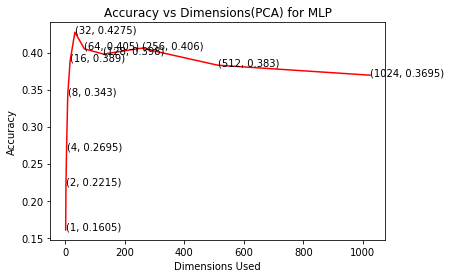

In [14]:
dims=[1,2,4,8,16,32,64,128,256, 512,1024]
for i in range(1,len(dec_PCA_acc)):
#     print(i)
    dec_PCA_f1[i] = round(dec_PCA_f1[i], 3)
#     print(i)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(dims,dec_PCA_acc,'r')
plt.xlabel('Dimensions Used')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dimensions(PCA) for MLP')
for xy in zip(dims, dec_PCA_acc):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.savefig('finalMLP_PCA_accuracy_1.svg',format='svg')

In [15]:
def sethyperparam(X, y, **kwargs):
     if kwargs['method'] == 'MLP':
            max_iter = kwargs['max_iter']
            learning_rate = kwargs['learning_rate']
            hidden_layer_sizes = kwargs['hidden_layer_sizes']
            solver = kwargs['solver']
            clf = MLPClassifier(solver=solver,learning_rate=learning_rate, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)
            clf = clf.fit(X, y)
            return clf

In [16]:
trn_data, trn_labels, tst_data, tst_labels = load_cifar()
trn_data, tst_data = list(map(image_prep, trn_data)), list(map(image_prep, tst_data))
X_train, X_val, y_train, y_val = train_test_split(trn_data, trn_labels,test_size = 0.20)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_val = scaling.transform(X_val)
tst_data = scaling.transform(tst_data)
 
reduced_model, X_reduced = reduce_dim(method='pca',dim=32,train_X = X_train,train_y = y_train)
test_X_reduced = reduced_model.transform(X_val)
reducedtestdata = reduced_model.transform(tst_data)

100%|██████████| 1/1 [00:00<00:00, 20.48it/s]


In [17]:
max_iter_range = [200,500]
learning_rate_range= ['constant', 'adaptive']
hidden_layer_sizes_range = [(100,20),(100,50),(100,50,10)]
solver_range = ['lbfgs', 'adam']
svm_PCA_acc1 = []
svm_PCA_f11 = []
def main2():
    for solver in solver_range:
        for learning_rate in learning_rate_range:
            for max_iter in max_iter_range:
                for hidden_layer_sizes in hidden_layer_sizes_range:
                    print(solver,learning_rate,max_iter,hidden_layer_sizes)
                    classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver=solver,learning_rate=learning_rate, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)
                    testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
                    trainf1, trainacc = test(classifer_model=classifer_model,test_X = X_reduced, test_y = y_train)
                    svm_PCA_acc1.append(testacc)
                    svm_PCA_f11.append(trainacc)
main2()

lbfgs constant 200 (100, 20)
0.3995
0.3995
0.700625
0.700625
lbfgs constant 200 (100, 50)
0.3735
0.3735
0.84725
0.84725
lbfgs constant 200 (100, 50, 10)
0.4085
0.4085
0.76125
0.76125
lbfgs constant 500 (100, 20)
0.3895
0.3895
0.76225
0.76225
lbfgs constant 500 (100, 50)
0.3525
0.3525
0.989375
0.989375
lbfgs constant 500 (100, 50, 10)
0.3655
0.3655
0.92475
0.92475
lbfgs adaptive 200 (100, 20)
0.409
0.409
0.66325
0.66325
lbfgs adaptive 200 (100, 50)
0.378
0.378
0.8655
0.8655
lbfgs adaptive 200 (100, 50, 10)
0.3845
0.3845
0.7591250000000002
0.759125
lbfgs adaptive 500 (100, 20)
0.377
0.377
0.7508749999999998
0.750875
lbfgs adaptive 500 (100, 50)
0.35849999999999993
0.3585
0.998
0.998
lbfgs adaptive 500 (100, 50, 10)
0.35550000000000004
0.3555
0.872
0.872
adam constant 200 (100, 20)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.4000000000000001
0.4
0.726
0.726
adam constant 200 (100, 50)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.378
0.378
0.8771249999999999
0.877125
adam constant 200 (100, 50, 10)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.3785
0.3785
0.866875
0.866875
adam constant 500 (100, 20)
0.3805
0.3805
0.7890000000000001
0.789
adam constant 500 (100, 50)
0.3785
0.3785
0.964375
0.964375
adam constant 500 (100, 50, 10)
0.362
0.362
0.9035
0.9035
adam adaptive 200 (100, 20)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.4075
0.4075
0.7218749999999999
0.721875
adam adaptive 200 (100, 50)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.3725
0.3725
0.87875
0.87875
adam adaptive 200 (100, 50, 10)


/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.364
0.364
0.848125
0.848125
adam adaptive 500 (100, 20)
0.39
0.39
0.752625
0.752625
adam adaptive 500 (100, 50)
0.36
0.36
0.979625
0.979625
adam adaptive 500 (100, 50, 10)
0.3655
0.3655
0.92325
0.92325


In [18]:
temp_sol = []
temp_learningrate = []
temp_maxitr = []
temp_hiddenlayer = []

for solver in solver_range:
        for learning_rate in learning_rate_range:
            for max_iter in max_iter_range:
                for hidden_layer_sizes in hidden_layer_sizes_range:
                    temp_sol.append(solver)
                    temp_learningrate.append(learning_rate)
                    temp_maxitr.append(max_iter)
                    temp_hiddenlayer.append(hidden_layer_sizes)

In [19]:
print(temp_sol)
print(temp_learningrate)
print(temp_maxitr)
print(temp_hiddenlayer)


['lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam']
['constant', 'constant', 'constant', 'constant', 'constant', 'constant', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'constant', 'constant', 'constant', 'constant', 'constant', 'constant', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive', 'adaptive']
[200, 200, 200, 500, 500, 500, 200, 200, 200, 500, 500, 500, 200, 200, 200, 500, 500, 500, 200, 200, 200, 500, 500, 500]
[(100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10), (100, 20), (100, 50), (100, 50, 10)]


In [20]:
data1 = {'Solver' : temp_sol,
         'Learning Rate' : temp_learningrate,
         'Max iterations': temp_maxitr,
         'Hidden Layers' : temp_hiddenlayer,
         'Test Accuracy' : svm_PCA_acc1,
         'Train Accuracy' : svm_PCA_f11
#         'Score':svm_PCA_f1
       }
p1 = pd.DataFrame(data1)
columnsTitles=["Solver","Learning Rate", "Max iterations","Hidden Layers", "Test Accuracy", "Train Accuracy"]
p1 = p1.reindex(columns=columnsTitles)
p1.index = range(1,25)
p1

,Solver,Learning Rate,Max iterations,Hidden Layers,Test Accuracy,Train Accuracy
1,lbfgs,constant,200,"(100, 20)",0.3995,0.700625
2,lbfgs,constant,200,"(100, 50)",0.3735,0.847250
3,lbfgs,constant,200,"(100, 50, 10)",0.4085,0.761250
4,lbfgs,constant,500,"(100, 20)",0.3895,0.762250
5,lbfgs,constant,500,"(100, 50)",0.3525,0.989375
6,lbfgs,constant,500,"(100, 50, 10)",0.3655,0.924750
7,lbfgs,adaptive,200,"(100, 20)",0.4090,0.663250
8,lbfgs,adaptive,200,"(100, 50)",0.3780,0.865500
9,lbfgs,adaptive,200,"(100, 50, 10)",0.3845,0.759125
10,lbfgs,adaptive,500,"(100, 20)",0.3770,0.750875


In [22]:
classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver="lbfgs",learning_rate="adaptive", max_iter=200, hidden_layer_sizes=(100,20))
testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
test(classifer_model=classifer_model,test_X = reducedtestdata, test_y = tst_labels)

0.3995
0.3995
0.3975
0.3975


(0.3975, 0.3975)

In [23]:
classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver="adam",learning_rate="adaptive", max_iter=200, hidden_layer_sizes=(100,20))
testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
test(classifer_model=classifer_model,test_X = reducedtestdata, test_y = tst_labels)

/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.4144999999999999
0.4145
0.4083
0.4083


(0.4083, 0.4083)

In [24]:
classifer_model = sethyperparam(X_reduced, y_train, method='MLP', solver="adam",learning_rate="constant", max_iter=200, hidden_layer_sizes=(100,20))
testf1, testacc = test(classifer_model=classifer_model,test_X = test_X_reduced, test_y = y_val)
test(classifer_model=classifer_model,test_X = reducedtestdata, test_y = tst_labels)

/home/kgarg/smai-18-mini-project-2/mypython/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.417
0.417
0.3962
0.3962


(0.3962, 0.3962)